In [1]:
print(1)

1


In [1]:
import numpy as np 
import matplotlib.pyplot as plt
import glob
import cv2

from keras.models import Model, Sequential
from keras.layers import Dense, Flatten, Conv2D, MaxPooling2D
from tensorflow.keras.layers import BatchNormalization
import os

import seaborn as sns

In [2]:
print(os.listdir("luster/"))

['dull', 'greasy', 'shiny', 'silky']


In [3]:
SIZE = 128

train_images = []
train_labels = [] 

for directory_path in glob.glob("luster/*"):
    label = directory_path.split(os.path.sep)[-1]
    print(label)
    
    for img_path in glob.glob(os.path.join(directory_path, "*.jpeg")):

        
        print(img_path)
        
        # Load the image
        img = cv2.imread(img_path, cv2.IMREAD_COLOR)
        
        # Check if the image is loaded successfully
        if img is None:
            print(f"Error loading image: {img_path}")
            continue  # Skip to the next image
        
        # Resize the image
        img = cv2.resize(img, (SIZE, SIZE))
        
        # Check if the image is resized successfully
        if img.size == 0:
            print(f"Error resizing image: {img_path}")
            continue  # Skip to the next image
        
        # Convert BGR to RGB
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        
        # Append the image and label to the lists

        train_images.append(img)
        
        train_labels.append(label)
        #print(train_images)

train_images = np.array(train_images)
train_labels = np.array(train_labels)
       

dull
luster\dull\HelloIMG1702567124420.jpeg
luster\dull\HelloIMG1702567132341.jpeg
luster\dull\HelloIMG1702567135180.jpeg
luster\dull\HelloIMG1702567141521.jpeg
luster\dull\HelloIMG1702567150659.jpeg
luster\dull\HelloIMG1702567157616.jpeg
luster\dull\HelloIMG1702567161900.jpeg
luster\dull\HelloIMG1702567166943.jpeg
luster\dull\HelloIMG1702567175495.jpeg
luster\dull\HelloIMG1702567180892.jpeg
luster\dull\HelloIMG1702567192501.jpeg
luster\dull\HelloIMG1702567196144.jpeg
luster\dull\HelloIMG1702567206094.jpeg
luster\dull\HelloIMG1702567213384.jpeg
luster\dull\HelloIMG1702567222378.jpeg
luster\dull\HelloIMG1702567229001.jpeg
luster\dull\HelloIMG1702567257223.jpeg
luster\dull\HelloIMG1702567269058.jpeg
luster\dull\HelloIMG1702567295396.jpeg
luster\dull\HelloIMG1702567339239.jpeg
luster\dull\HelloIMG1702567354104.jpeg
luster\dull\HelloIMG1702567391414.jpeg
luster\dull\HelloIMG1702567401586.jpeg
luster\dull\HelloIMG1702567411957.jpeg
luster\dull\HelloIMG1702567421594.jpeg
luster\dull\HelloIMG

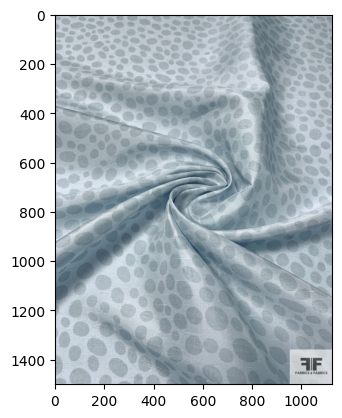

In [4]:
test_images = []
test_labels = [] 
for directory_path in glob.glob("lustertest/*"):
    fruit_label = directory_path.split("\\")[-1]
    for img_path in glob.glob(os.path.join(directory_path, "*.jpeg")):
        # Load the image
        img = cv2.imread(img_path, cv2.IMREAD_COLOR)
        plt.imshow(img)
        # Check if the image is loaded successfully
        if img is None:
            print(f"Error loading image: {img_path}")
            continue  # Skip to the next image
        
        # Resize the image
        img = cv2.resize(img, (SIZE, SIZE))
        
        # Check if the image is resized successfully
        if img.size == 0:
            print(f"Error resizing image: {img_path}")
            continue  # Skip to the next image
        
        # Convert BGR to RGB
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        
         
        test_images.append(img)
        test_labels.append(fruit_label)
        
test_images = np.array(test_images)
test_labels = np.array(test_labels)

        
       





In [5]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
le.fit(test_labels)
test_labels_encoded = le.transform(test_labels)
le.fit(train_labels)
train_labels_encoded = le.transform(train_labels)

In [6]:
#Split data into test and train datasets (already split but assigning to meaningful convention)
x_train, y_train, x_test, y_test = train_images, train_labels_encoded, test_images, test_labels_encoded


In [7]:
# Normalize pixel values to between 0 and 1
x_train, x_test = x_train / 255.0, x_test /255.0

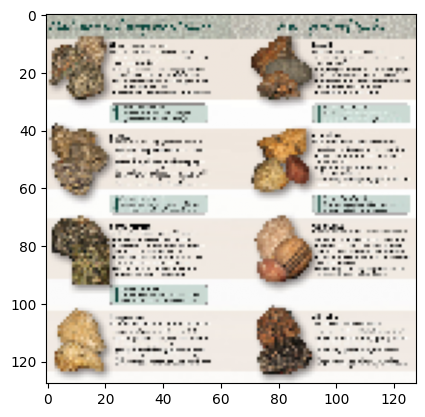

In [8]:
plt.imshow(x_test[5])

In [9]:
#One hot encode y values for neural network. 
from keras.utils import to_categorical
y_train_one_hot = to_categorical(y_train)


y_test_one_hot = to_categorical(y_test)

In [10]:
activation = 'sigmoid'

feature_extractor = Sequential()
feature_extractor.add(Conv2D(32, 3, activation = activation, padding = 'same', input_shape = (SIZE, SIZE, 3)))
feature_extractor.add(BatchNormalization())

feature_extractor.add(Conv2D(32, 3, activation = activation, padding = 'same', kernel_initializer = 'he_uniform'))
feature_extractor.add(BatchNormalization())
feature_extractor.add(MaxPooling2D())

feature_extractor.add(Conv2D(64, 3, activation = activation, padding = 'same', kernel_initializer = 'he_uniform'))
feature_extractor.add(BatchNormalization())

feature_extractor.add(Conv2D(64, 3, activation = activation, padding = 'same', kernel_initializer = 'he_uniform'))
feature_extractor.add(BatchNormalization())
feature_extractor.add(MaxPooling2D())

feature_extractor.add(Flatten())




In [11]:
#Add layers for deep learning prediction
x = feature_extractor.output  
x = Dense(128, activation = activation, kernel_initializer = 'he_uniform')(x)
prediction_layer = Dense(4, activation = 'softmax')(x)


In [12]:
# Make a new model combining both feature extractor and x
cnn_model = Model(inputs=feature_extractor.input, outputs=prediction_layer)
cnn_model.compile(optimizer='rmsprop',loss = 'categorical_crossentropy', metrics = ['accuracy'])
print(cnn_model.summary()) 





Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_input (InputLayer)   [(None, 128, 128, 3)]     0         
                                                                 
 conv2d (Conv2D)             (None, 128, 128, 32)      896       
                                                                 
 batch_normalization (Batch  (None, 128, 128, 32)      128       
 Normalization)                                                  
                                                                 
 conv2d_1 (Conv2D)           (None, 128, 128, 32)      9248      
                                                                 
 batch_normalization_1 (Bat  (None, 128, 128, 32)      128       
 chNormalization)                                                
                                                                 
 max_pooling2d (MaxPooling2  (None, 64, 64, 32)        0    

In [13]:
# Make a new model combining both feature extractor and x
cnn_model = Model(inputs=feature_extractor.input, outputs=prediction_layer)
cnn_model.compile(optimizer='rmsprop',loss = 'categorical_crossentropy', metrics = ['accuracy'])
print(cnn_model.summary()) 




Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_input (InputLayer)   [(None, 128, 128, 3)]     0         
                                                                 
 conv2d (Conv2D)             (None, 128, 128, 32)      896       
                                                                 
 batch_normalization (Batch  (None, 128, 128, 32)      128       
 Normalization)                                                  
                                                                 
 conv2d_1 (Conv2D)           (None, 128, 128, 32)      9248      
                                                                 
 batch_normalization_1 (Bat  (None, 128, 128, 32)      128       
 chNormalization)                                                
                                                                 
 max_pooling2d (MaxPooling2  (None, 64, 64, 32)        0   

In [14]:
##########################################
#Train the CNN model
history = cnn_model.fit(x_train, y_train_one_hot, epochs=50, validation_data = (x_test, y_test_one_hot))


Epoch 1/50


5/5 [==============================] - 4s 547ms/step - loss: 2.1749 - accuracy: 0.3354 - val_loss: 1.6053 - val_accuracy: 0.1515
Epoch 2/50
5/5 [==============================] - 2s 494ms/step - loss: 2.1085 - accuracy: 0.3418 - val_loss: 1.5473 - val_accuracy: 0.1515
Epoch 3/50
5/5 [==============================] - 3s 541ms/step - loss: 1.9509 - accuracy: 0.3291 - val_loss: 1.5623 - val_accuracy: 0.1212
Epoch 4/50
5/5 [==============================] - 3s 556ms/step - loss: 1.6838 - accuracy: 0.3924 - val_loss: 1.6049 - val_accuracy: 0.1212
Epoch 5/50
5/5 [==============================] - 3s 552ms/step - loss: 1.4885 - accuracy: 0.3861 - val_loss: 1.5440 - val_accuracy: 0.1212
Epoch 6/50
5/5 [==============================] - 3s 566ms/step - loss: 1.3963 - accuracy: 0.3671 - val_loss: 1.3836 - val_accuracy: 0.1515
Epoch 7/50
5/5 [==============================] - 3s 511ms/step - loss: 1.3512 - accuracy: 0.4241 - val_loss: 1.6377 - val_accuracy: 0.1212
Epoch 8/50
5/5 [==

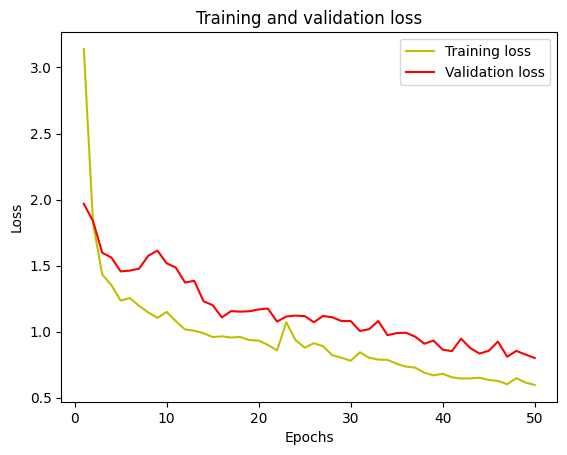

In [17]:
#plot the training and validation accuracy and loss at each epoch
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'y', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()


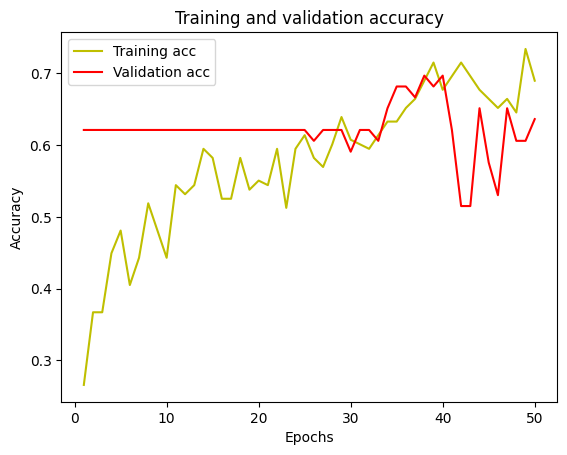

In [18]:
accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']
plt.plot(epochs, accuracy, 'y', label='Training acc')
plt.plot(epochs, val_accuracy, 'r', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()




3/3 [==============================] - 1s 113ms/step
[[ 0  0  0  0  0  0  0  0]
 [ 4  0  6  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0]
 [15  0 25  0  0  0  1  0]
 [ 0  0  0  0  0  0  0  0]
 [ 0  0  0  0  8  0  0  0]
 [ 0  0  0  0  0  0  0  0]
 [ 1  0  1  0  0  0  5  0]]


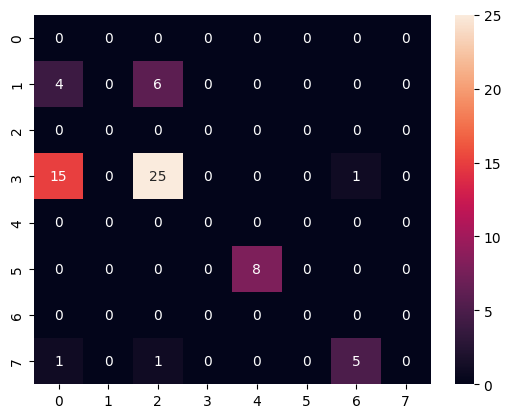

In [19]:
prediction_NN = cnn_model.predict(x_test)
prediction_NN = np.argmax(prediction_NN, axis=-1)
prediction_NN = le.inverse_transform(prediction_NN)

#Confusion Matrix - verify accuracy of each class
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(test_labels, prediction_NN)
print(cm)
sns.heatmap(cm, annot=True)

cnn_model.save("firstclassifier.h5") 

In [20]:
#n=5 dog park. NN not as good as RF.
n=9  #Select the index of image to be loaded for testing
img = x_test[n]
cv2.imshow("hi",img)
input_img = np.expand_dims(img, axis=0) #Expand dims so the input is (num images, x, y, c)
prediction = np.argmax(cnn_model.predict(input_img))  #argmax to convert categorical back to original
prediction = le.inverse_transform([prediction])  #Reverse the label encoder to original name
print("The prediction for this image is: ", prediction)
print("The actual label for this image is: ", test_labels[n])



1/1 [==============================] - 0s 35ms/step
The prediction for this image is:  ['dull']
The actual label for this image is:  dull rocks


In [21]:
################################
#Now, let us use features from convolutional network for RF
X_for_RF = feature_extractor.predict(x_train) #This is out X input to RF


5/5 [==============================] - 1s 221ms/step


In [22]:
#RANDOM FOREST
from sklearn.ensemble import RandomForestClassifier
RF_model = RandomForestClassifier(n_estimators = 50, random_state = 42)


In [23]:
# Train the model on training data
RF_model.fit(X_for_RF, y_train) #For sklearn no one hot encoding




RandomForestClassifier(n_estimators=50, random_state=42)

In [24]:
#Send test data through same feature extractor process
X_test_feature = feature_extractor.predict(x_test)
#Now predict using the trained RF model. 
prediction_RF = RF_model.predict(X_test_feature)
#Inverse le transform to get original label back. 
prediction_RF = le.inverse_transform(prediction_RF)

3/3 [==============================] - 0s 119ms/step


In [25]:
#Print overall accuracy
from sklearn import metrics
print ("Accuracy = ", metrics.accuracy_score(test_labels, prediction_RF))




Accuracy =  0.0


['r2_classifier.joblib']

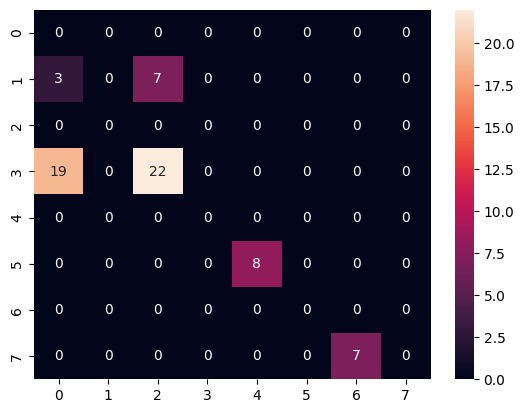

In [27]:
#Confusion Matrix - verify accuracy of each class
cm = confusion_matrix(test_labels, prediction_RF)
#print(cm)
sns.heatmap(cm, annot=True)
import joblib
joblib.dump(RF_model, "r2_classifier.joblib")



1/1 [==============================] - 0s 35ms/step
The prediction for this image is:  ['greasy']
The actual label for this image is:  greasy rocks


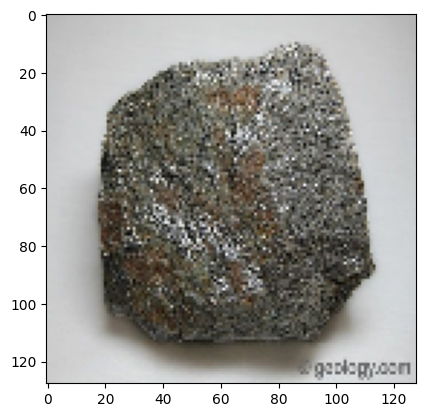

In [29]:
#Check results on a few select images
#n=5 #dog park. RF works better than CNN
n=27#Select the index of image to be loaded for testing
img = x_test[n]
plt.imshow(img)
input_img = np.expand_dims(img, axis=0) #Expand dims so the input is (num images, x, y, c)
input_img_features=feature_extractor.predict(input_img)
prediction_RF = RF_model.predict(input_img_features)[0] 
prediction_RF = le.inverse_transform([prediction_RF])  #Reverse the label encoder to original name


print("The prediction for this image is: ", prediction_RF)
print("The actual label for this image is: ", test_labels[n])